# Supervised Learning - Regression Project

- Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

- Brief description of the data set you chose and a summary of its attributes.

- Brief summary of data exploration and actions taken for data cleaning and feature engineering.

- Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

- A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

Dataset

The data set chosen will be the Ames_Housing_Sales dataset. It containes 1378 rows and 80 columns of data with 43 categorical columns, 21 float columns and 16 integer columns.

Data Exploration

I chose to take a brief overview of the summary statistics (mean, standard deviation etc.) of the entire dataset, just to have an idea of the differences across columns. I then applied one hot encoding in order to come up with 251 additional dummy variable columns, dropping the 43 initial categorical columns. I then transformed the float columns using log-transformation for skews larger than 0.75 in order to eliminate the skews and normalize the features.

# Data Exploration and Feature Engineering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data using the file path

data = pd.read_csv('Ames_Housing_Sales.csv')

In [2]:
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of rows in the data: 1379
Number of columns in the data: 80


In [3]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [5]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


In [23]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

In [24]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [25]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

In [26]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    data[col] = data[col].apply(np.log1p)

In [28]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1,0,5.017280,0.000000,...,0,0,0,0,0,0,0,1,1,0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0,1,5.652489,0.000000,...,0,0,0,0,0,0,0,1,1,0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1,0,6.075346,0.000000,...,0,0,0,0,0,0,0,1,1,0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1,0,6.293419,5.609472,...,0,0,0,0,0,0,0,1,1,0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1,0,6.196444,0.000000,...,0,0,0,0,0,0,0,1,1,0


# Regression Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [29]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

In [30]:
# root-mean-squared error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

## Linear Regression

In [34]:
## Linear Regression
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

78601.29338614641


In [66]:
y_pred = linearRegression.predict(X_test)
r2_score(y_pred, y_test)

0.46735711671763425

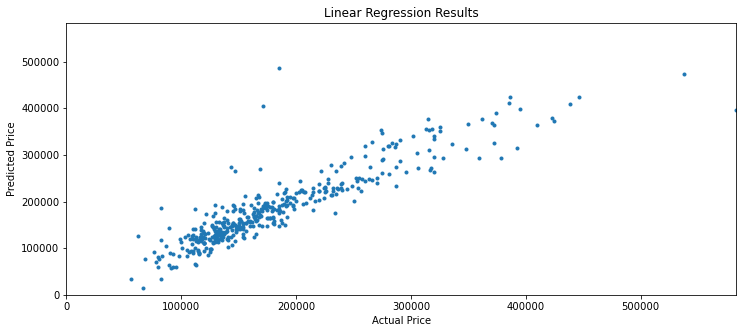

In [38]:
plt.figure(figsize=(12,5))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');
plt.show()

## Ridge Regression

In [31]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print("The best alpha is: {} with Root Mean Square Error: {}".format(
                                        ridgeCV.alpha_, ridgeCV_rmse))

The best alpha is: 10.0 with Root Mean Square Error: 32040.433237817062


## LASSO Regression

In [63]:
from sklearn.linear_model import LassoCV
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                   110, 120, 130, 150, 200, 250, 300, 350, 400, 500, 600, 800, 1000])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Lasso is slower
print("The best alpha is: {} with Root Mean Square Error: {}".format(
                                        lassoCV.alpha_, lassoCV_rmse))

The best alpha is: 130.0 with Root Mean Square Error: 36543.496470680446


In [57]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 251 coefficients, 233 are non-zero with Lasso.


## Elastic Net Regression

In [50]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.001 0.1 34615.47226839278


## Comparison of All Models

In [51]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,78601.293386
Ridge,32040.433238
Lasso,88720.627985
ElasticNet,34615.472268


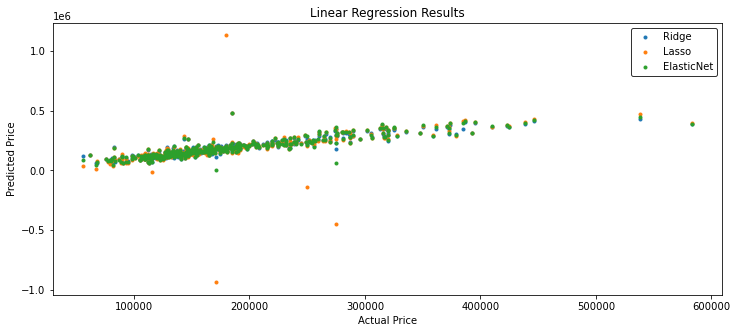

In [52]:
f = plt.figure(figsize=(12,5))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

# Comparing Scores and R-Squared

In [58]:
s = StandardScaler()

In [65]:
# RIDGE 

ridge = Ridge(alpha = ridgeCV.alpha_)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
ridge.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = ridge.predict(X_test_s)

# Calculating r2 score
print("r2 score for Ridge with alpha = {}: {}".format(ridgeCV.alpha_, r2_score(y_pred, y_test)))


# LASSO

las = Lasso(alpha = lassoCV.alpha_, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las.predict(X_test_s)

# Calculating r2 score
print("r2 score for LASSO with alpha = {}: {}".format(lassoCV.alpha_, r2_score(y_pred, y_test)))


# Using vanilla Linear Regression

lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

r2 score for Ridge with alpha = 10.0: 0.7162546619909416
r2 score for LASSO with alpha = 130.0: 0.7214883215161801
r2 score for Linear Regression: -0.00198387307986736
Magnitude of Lasso coefficients: 404185.54269450484
Number of coeffients not equal to 0 for Lasso: 189
Magnitude of Linear Regression coefficients: 1.0440080125253682e+17
Number of coeffients not equal to 0 for Linear Regression: 248
